In [30]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [31]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Get genotypes

In [32]:
raw=pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/germline-immune/hla.snp.raw",delim_whitespace=True)
raw=raw.set_index("FID")
raw=raw.iloc[:,5:]

In [33]:
[x for x in raw if "6:29933439:T:C" in x]

['6:29933439:T:C_C']

In [34]:
raw.columns=[x.split("_")[0] for x in raw.columns]

In [35]:
raw.head()

,6:26364628:A:C,6:26370605:T:C,6:27410422:G:A,6:28741734:C:A,6:29592532:C:A,6:29697517:G:A,6:29752808:A:G,6:29782027:C:T,6:29816371:T:G,6:29893626:C:A,...,6:32796793:G:A,6:32804570:G:A,6:32850839:C:T,6:32852448:C:T,6:32853511:G:A,6:32899485:G:A,6:32900718:G:A,6:33049074:G:T,6:33064393:G:A,6:33077271:A:G
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
TCGA-01-0630,1,2,1,0,0,1,0,2,0,0,...,0,1,0,0,0,0,1,1,0,1
TCGA-01-0633,0,2,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
TCGA-01-0636,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
TCGA-01-0637,0,2,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,2


In [52]:
tpm=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/discovery/phenotypes/processed_phenos/tpm/tumor/pheno_all_zcancer",delimiter="\t")
firebrowse=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/discovery/phenotypes/processed_phenos/firebrowse/tumor/pheno_all_zcancer",delimiter="\t")
pancan=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/discovery/phenotypes/processed_phenos/pancanatlas/tumor/pheno_all_zcancer",delimiter="\t")

In [53]:
ase=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/hla-deep-dive/phenotypes/hla-ase/avg/pheno_all_zcancer",delimiter="\t")

### map to cancer types

In [37]:
canc = pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/birdseed-processing/gtype.meta", delimiter="\t", header=None)
mp = canc.set_index(2)[0].to_dict()

tpm["cancer"]=tpm["FID"].map(mp)
firebrowse["cancer"]=firebrowse["FID"].map(mp)
pancan["cancer"]=pancan["FID"].map(mp)

In [54]:
geno_immune=pd.merge(raw,ase,on=["FID"])

In [55]:
snp="6:29910358:G:C"
gene="HLA.A"

In [56]:
geno_immune_gene=geno_immune[~(geno_immune[gene]==-9)]

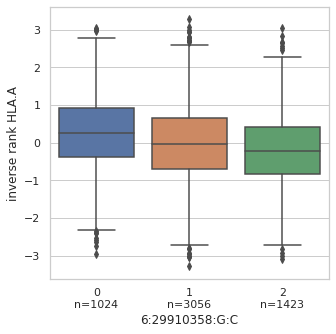

In [57]:
sns.set(style="whitegrid", font_scale = 1)
plt.figure(figsize=(5,5))
ax=sns.boxplot(x=snp,y=gene,data=geno_immune_gene)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels=[x+"\nn="+str(len(geno_immune_gene[geno_immune_gene[snp]==int(x)])) for x in labels]

ax.set_xticklabels(labels)
plt.ylabel("inverse rank "+gene)

plt.savefig("../plots/"+snp+"."+gene+".pdf")

## Filter for genotypes

In [17]:
snps=pd.read_csv("/cellar/users/mpagadal/Data/projects/germline-immune/snp-tables/immune-microenvironment-hla.tsv",delimiter="\t")

In [19]:
raw=raw[snps["snp"].unique().tolist()]

In [20]:
down=snps[snps["beta"]<0]["snp"].tolist()

In [22]:
for x in down:
    print(x)
    mp={0:2,1:1,2:0}
    raw[x]=raw[x].map(mp)

6:32596635:A:C
6:31239896:T:C
6:31227823:A:G
6:31347644:G:A
6:29910358:G:C
6:30141350:G:A
6:29592532:C:A
6:33077271:A:G
6:32634243:G:A
6:32422191:G:A
6:32615950:T:C
6:32682664:C:T
6:31602967:G:A
6:31154493:G:A
6:32645906:A:G
6:32596036:C:A
6:32208673:G:A
6:32804570:G:A
6:32615945:A:T
6:29752808:A:G
6:32074804:T:C
6:32751236:T:C
6:31351887:C:A
6:32625369:G:A
6:32681992:T:C
6:31009508:C:G
6:33064393:G:A
6:32624128:C:T
6:32619229:C:T
6:32628103:C:T
6:28741734:C:A
6:27410422:G:A
6:31298890:C:T
6:32395000:C:A
6:30769726:C:T
6:31347069:C:T
6:31141612:T:A
6:29697517:G:A
6:31458936:A:T
6:32403119:G:A
6:32796793:G:A
6:32634243:G:A
6:32636351:T:C
6:32603936:A:G
6:31322980:C:T
6:31238053:C:G
6:29921773:C:T
6:31409102:T:G
6:31364076:C:T
6:31329494:T:C
6:29910371:C:T
6:26364628:A:C
6:32614080:C:T
6:29909372:G:C
6:29921927:T:C
6:32605295:C:T


In [23]:
raw.head()

,6:32580657:T:C,6:32609106:T:C,6:32602396:T:C,6:32596635:A:C,6:32633130:G:A,6:32664117:A:G,6:32517646:T:G,6:32853511:G:A,6:31239896:T:C,6:31243767:G:C,...,6:32614080:C:T,6:32731258:A:G,6:32626696:C:G,6:31461771:T:A,6:31462248:T:G,6:29910276:G:T,6:29909372:G:C,6:29921927:T:C,6:32610059:G:T,6:32605295:C:T
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628,0,0,0,0,0,0,0,0,2,1,...,0,0,0,1,1,1,0,2,2,2
TCGA-01-0630,0,1,1,2,0,2,0,0,2,0,...,2,1,1,1,1,1,2,2,0,1
TCGA-01-0633,0,1,0,1,0,1,0,0,2,1,...,1,1,0,1,1,1,2,2,1,0
TCGA-01-0636,1,1,1,2,1,2,1,0,2,0,...,1,0,2,1,1,0,1,2,0,1
TCGA-01-0637,1,2,1,2,0,1,0,0,2,1,...,2,1,0,1,1,0,2,2,0,0


In [24]:
raw["score"]=raw.sum(axis=1)/(2*len(df))

In [25]:
raw["score"].to_csv("../data/hla-conditional-burden.tsv",sep="\t")

## Get phenotype

In [82]:
pheno=pd.read_csv("../processed_phenos/firebrowse/pheno_all_zcancer",delimiter="\t")

In [83]:
raw=raw.reset_index()

In [84]:
raw_pheno=pd.merge(raw,pheno,on="FID",how="left")

## plot burden

In [93]:
gene="HLA.B"

In [94]:
raw_pheno_filt=raw_pheno[raw_pheno[gene]!=-9]

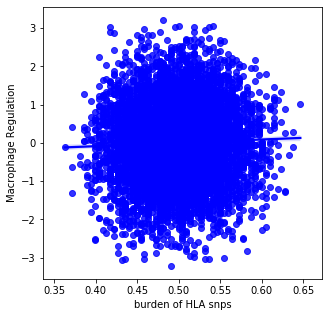

In [95]:
f=plt.figure(figsize=(5,5))
sns.regplot(x="score",y="HLA.A",data=raw_pheno_filt,color="blue")
plt.xlabel("burden of HLA snps")
plt.ylabel("Macrophage Regulation")
plt.savefig("burden.pdf")

## Get age of diagnosis

In [104]:
cov=pd.read_csv("/cellar/users/mpagadal/Data/plink-associations/covs/immune.filt.cov",delimiter=" ")

In [109]:
age=pd.merge(raw_pheno_filt,cov,on="FID",how="left")

In [111]:
age_filt=age[age["age"]!=-9]

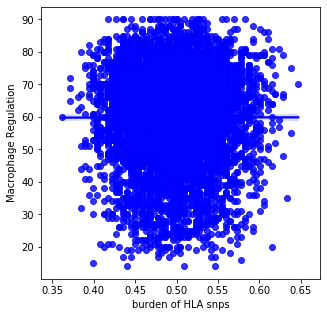

In [113]:
f=plt.figure(figsize=(5,5))
sns.regplot(x="score",y="age",data=age_filt,color="blue")
plt.xlabel("burden of HLA snps")
plt.ylabel("Macrophage Regulation")
plt.savefig("burden.pdf")

In [108]:
cov["age"]

0       -9
1       -9
2       -9
3       -9
4       -9
        ..
8277    79
8278    64
8279    55
8280    52
8281    64
Name: age, Length: 8282, dtype: int64